In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from random import random
import pandas_datareader as dr


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
companies = ['TATASTEEL.NS','DRREDDY.NS','BAJAJFINSV.NS']
path = "/content/drive/MyDrive/TATASTEEL.NS.csv"
df1=pd.read_csv(path)
path = "/content/drive/MyDrive/DRREDDY.NS.csv"
df2=pd.read_csv(path)
path = "/content/drive/MyDrive/BAJAJFINSV.NS.csv"
df3=pd.read_csv(path)

In [ ]:
full_df = pd.concat([df1,df2,df3],axis=1)

In [ ]:
full_df

,Date,TataSteel,DrReddy,BajajFinserv
0,10-06-2020,315.814056,4086.174561,5223.000000
1,11-06-2020,305.238159,4031.626221,5158.000000
2,12-06-2020,309.575745,3982.293945,5285.950195
3,15-06-2020,298.463776,3986.616211,5103.600098
4,16-06-2020,301.144318,3979.809814,5128.299805
...,...,...,...,...
246,03-06-2021,1122.000000,5282.549805,11819.849610
247,04-06-2021,1120.699951,5255.000000,12155.650390
248,07-06-2021,1128.699951,5219.200195,11828.549810
249,08-06-2021,1111.099976,5274.750000,11733.099610


In [ ]:
full_df.set_index("Date", inplace=True)
log_ret = np.log(full_df / full_df.shift(1))
log_ret.head()

,TataSteel,DrReddy,BajajFinserv
Date,,,
10-06-2020,NaN,NaN,NaN
11-06-2020,-0.034061,-0.013439,-0.012523
12-06-2020,0.014110,-0.012312,0.024503
15-06-2020,-0.036554,0.001085,-0.035106
16-06-2020,0.008941,-0.001709,0.004828


In [ ]:
np.random.seed(42)
num_ports = 8000
all_weights = np.zeros((num_ports, len(full_df.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(3))
    weights = weights/np.sum(weights)
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [ ]:
print('Max sharpe ratio n the arrray: {}'.format(sharpe_arr.max()))
print("Its location in the array: {}".format(sharpe_arr.argmax()))

Max sharpe ratio n the arrray: 3.1472613843982753
Its location in the array: 974


In [ ]:
# get allocations in this max
print(all_weights[974,:])

max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

[0. 0. 0.]


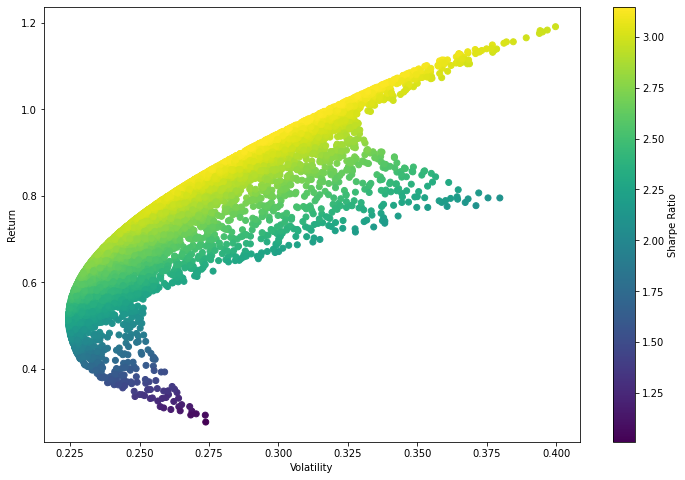

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()